In [1]:
# its a great honor to read Mr.Shad's article and applying his fantasic knowledges and skills in this project Thank you Sir.

# johnhhu

In [2]:
def concat_df(train_data,test_data):
    return pd.concat([train_data,test_data],sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:20631],all_data.loc[20632:]

In [3]:
###
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly as plotly
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import types
import pandas as pd
def __iter__(self): return 0

In [4]:
import pandas as pd

train_data=pd.read_table("PM_train.txt", sep=" ", header=None)
test_data=pd.read_table("PM_test.txt", sep=" ", header=None)
truth_data=pd.read_excel("Test.xlsx", index_col=0)

In [5]:
print("train_data_contains: "+str(len(train_data))+" row and "+str(len(train_data.columns))+" columns")
print("test_data_contains: "+str(len(test_data))+" row and "+str(len(test_data.columns))+" columns")
print("truth_data_contains: "+str(len(truth_data))+" row and "+str(len(truth_data.columns))+" columns")

train_data_contains: 20631 row and 28 columns
test_data_contains: 13096 row and 28 columns
truth_data_contains: 100 row and 0 columns


In [6]:
df_all=concat_df(train_data,test_data)


In [7]:
print("first_6_row_of_train_data")
display(train_data.head(6))
print("first_6_row_of_test_data")
display(test_data.head(6))
print("first_6_row_of_truth_data")
display(truth_data.head(6))


first_6_row_of_train_data


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,NaN,NaN


first_6_row_of_test_data


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467,NaN,NaN


first_6_row_of_truth_data


""
predicted
44.447977
57.921903
60.631183
93.823373
62.894016
78.744771


In [8]:
df_all.shape

(33727, 28)

In [9]:
# Subtract previous row value from the current row value in a Pandas column

train_data[26]=train_data[0] - train_data[0].shift(1)
test_data[26]=test_data[0] - test_data[0].shift(1)


###########
#df_all[26]=df_all[0]-df_all[0].shift(1)

In [10]:
print("failure_point_of_train_data")
display(train_data.head(196))
print("failure_point_of_test_data")
display(test_data.tail(199))

failure_point_of_train_data


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.0,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.0,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.0,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0.0,NaN
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,1.0,NaN
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,8131.09,8.4167,0.03,392,2388,100.0,39.06,23.4085,0.0,NaN
194,2,3,0.0018,0.0003,100.0,518.67,641.55,1588.32,1398.96,14.62,...,8140.58,8.3802,0.03,391,2388,100.0,39.11,23.4250,0.0,NaN


failure_point_of_test_data


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
12897,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,...,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595,0.0,NaN
12898,100,1,0.0014,0.0003,100.0,518.67,641.65,1591.50,1401.63,14.62,...,8138.54,8.4067,0.03,391,2388,100.0,39.01,23.3087,1.0,NaN
12899,100,2,0.0031,0.0001,100.0,518.67,642.20,1588.99,1402.05,14.62,...,8137.35,8.4291,0.03,393,2388,100.0,38.97,23.3510,0.0,NaN
12900,100,3,-0.0000,0.0001,100.0,518.67,642.27,1587.47,1396.74,14.62,...,8134.63,8.4039,0.03,392,2388,100.0,39.14,23.3636,0.0,NaN
12901,100,4,0.0011,0.0001,100.0,518.67,642.07,1579.17,1401.93,14.62,...,8139.06,8.4057,0.03,393,2388,100.0,39.04,23.3925,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,0.0,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,0.0,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,0.0,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,0.0,NaN


In [11]:
train_data.rename(columns={0: 'asset_id', 1: 'run_time'}, inplace=True)
train_data.rename(columns={2: 'setting_1', 3: 'setting_2', 4: 'setting_3'}, inplace=True)
train_data.rename(columns={5: 's_1', 6: 's_2', 7: 's_3', 8: 's_4', 9: 's_5', 10: 's_6', 
                          11: 's_7', 12: 's_8', 13: 's_9', 14: 's_10', 15: 's_11', 16: 's_12', 
                          17: 's_13', 18: 's_14', 19: 's_15', 20: 's_16', 21: 's_17', 22: 's_18', 
                          23: 's_19', 24: 's_20', 25: 's_21', 26: 'failure'}, inplace=True)

test_data.rename(columns={0: 'asset_id', 1: 'run_time'}, inplace=True)
test_data.rename(columns={2: 'setting_1', 3: 'setting_2', 4: 'setting_3'}, inplace=True)
test_data.rename(columns={5: 's_1', 6: 's_2', 7: 's_3', 8: 's_4', 9: 's_5', 10: 's_6', 
                          11: 's_7', 12: 's_8', 13: 's_9', 14: 's_10', 15: 's_11', 16: 's_12', 
                          17: 's_13', 18: 's_14', 19: 's_15', 20: 's_16', 21: 's_17', 22: 's_18', 
                          23: 's_19', 24: 's_20', 25: 's_21', 26: 'failure'}, inplace=True)


In [12]:
df_all=concat_df(train_data,test_data)


In [13]:
print("failure_point_of_train_data")
display(train_data.head(196))
print("failure_point_of_test_data")
display(test_data.tail(199))

print("failure_point_of_df_all")
display(df_all.head(196))

failure_point_of_train_data


,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.0,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.0,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.0,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0.0,NaN
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,1.0,NaN
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,8131.09,8.4167,0.03,392,2388,100.0,39.06,23.4085,0.0,NaN
194,2,3,0.0018,0.0003,100.0,518.67,641.55,1588.32,1398.96,14.62,...,8140.58,8.3802,0.03,391,2388,100.0,39.11,23.4250,0.0,NaN


failure_point_of_test_data


,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,27
12897,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,...,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595,0.0,NaN
12898,100,1,0.0014,0.0003,100.0,518.67,641.65,1591.50,1401.63,14.62,...,8138.54,8.4067,0.03,391,2388,100.0,39.01,23.3087,1.0,NaN
12899,100,2,0.0031,0.0001,100.0,518.67,642.20,1588.99,1402.05,14.62,...,8137.35,8.4291,0.03,393,2388,100.0,38.97,23.3510,0.0,NaN
12900,100,3,-0.0000,0.0001,100.0,518.67,642.27,1587.47,1396.74,14.62,...,8134.63,8.4039,0.03,392,2388,100.0,39.14,23.3636,0.0,NaN
12901,100,4,0.0011,0.0001,100.0,518.67,642.07,1579.17,1401.93,14.62,...,8139.06,8.4057,0.03,393,2388,100.0,39.04,23.3925,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,0.0,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,0.0,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,0.0,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,0.0,NaN


failure_point_of_df_all


,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.0,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.0,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.0,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0.0,NaN
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,1.0,NaN
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,8131.09,8.4167,0.03,392,2388,100.0,39.06,23.4085,0.0,NaN
194,2,3,0.0018,0.0003,100.0,518.67,641.55,1588.32,1398.96,14.62,...,8140.58,8.3802,0.03,391,2388,100.0,39.11,23.4250,0.0,NaN


In [14]:
print("missing_values_in_train_data")
display(train_data.isnull().sum())
print("missing_value_in_test_data")
display(test_data.isnull().sum())

missing_values_in_train_data


asset_id         0
run_time         0
setting_1        0
setting_2        0
setting_3        0
s_1              0
s_2              0
s_3              0
s_4              0
s_5              0
s_6              0
s_7              0
s_8              0
s_9              0
s_10             0
s_11             0
s_12             0
s_13             0
s_14             0
s_15             0
s_16             0
s_17             0
s_18             0
s_19             0
s_20             0
s_21             0
failure          1
27           20631
dtype: int64

missing_value_in_test_data


asset_id         0
run_time         0
setting_1        0
setting_2        0
setting_3        0
s_1              0
s_2              0
s_3              0
s_4              0
s_5              0
s_6              0
s_7              0
s_8              0
s_9              0
s_10             0
s_11             0
s_12             0
s_13             0
s_14             0
s_15             0
s_16             0
s_17             0
s_18             0
s_19             0
s_20             0
s_21             0
failure          1
27           13096
dtype: int64

In [15]:
#train_data.describe()


########
df_all.describe()


,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,27
count,33727.000000,33727.000000,33727.000000,33727.000000,33727.0,33727.00,33727.000000,33727.000000,33727.000000,3.372700e+04,...,33727.000000,33727.000000,3.372700e+04,33727.000000,33727.0,33727.0,33727.000000,33727.000000,33725.000000,0.0
mean,51.521066,96.393572,-0.000010,0.000003,100.0,518.67,642.601005,1589.581927,1407.303559,1.462000e+01,...,8141.887005,8.435816,3.000000e-02,392.962523,2388.0,100.0,38.845871,23.307581,0.005871,NaN
std,28.866537,65.100528,0.002193,0.000293,0.0,0.00,0.474789,5.840324,8.432656,3.552766e-15,...,16.382482,0.035360,1.387799e-17,1.468023,0.0,0.0,0.170757,0.102073,0.076398,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.130000,1569.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000,NaN
25%,27.000000,43.000000,-0.001500,-0.000200,100.0,518.67,642.270000,1585.530000,1401.230000,1.462000e+01,...,8132.780000,8.411000,3.000000e-02,392.000000,2388.0,100.0,38.740000,23.245900,0.000000,NaN
50%,52.000000,88.000000,0.000000,0.000000,100.0,518.67,642.560000,1589.210000,1406.450000,1.462000e+01,...,8139.620000,8.432400,3.000000e-02,393.000000,2388.0,100.0,38.860000,23.316600,0.000000,NaN
75%,77.000000,140.000000,0.001500,0.000300,100.0,518.67,642.890000,1593.160000,1412.240000,1.462000e+01,...,8146.600000,8.457000,3.000000e-02,394.000000,2388.0,100.0,38.970000,23.379200,0.000000,NaN
max,100.000000,362.000000,0.008700,0.000700,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.641900,1.000000,NaN


In [16]:
#failure=train_data.groupby(['failure'])['failure'].count()

#failure


########
failure=train_data.groupby(['failure'])['failure'].count()

failure

failure
0.0    20531
1.0       99
Name: failure, dtype: int64

In [17]:
failure_2=test_data.groupby(['failure'])['failure'].count()

failure_2

failure
0.0    12996
1.0       99
Name: failure, dtype: int64

In [18]:
df_all=concat_df(train_data,test_data)


In [19]:
failure_3=df_all.groupby(['failure'])['failure'].count()

failure_3

failure
0.0    33527
1.0      198
Name: failure, dtype: int64

In [20]:
# train_data.drop(['s_1','s_5','s_6','s_10','s_16','s_18','s_19'], axis = 1) 


In [21]:
# train_data['s_2']=pd.cut(train_data['s_2'],7)
# train_data['s_2']=pd.qcut(train_data['s_2'],7,labels=["<1.684","<2.159","<2.633","<3.107","<3.581","<4.056","<4.530"])

#train_data['s_2']=pd.cut(train_data['s_2'],5,labels=["1","2","3","4","5"])

#train_data.groupby('s_2')['s_2'].count()

In [22]:
#Subtract values from maximum value within groups
train_data[27]=train_data.groupby('asset_id').run_time.transform('max') - train_data.run_time

#
train_data["failure"].fillna(0, inplace = True)   ###0.0

train_data.rename(columns={27: 'remain_cycle'}, inplace=True)


#Subtract values from maximum value within groups
test_data[27]=test_data.groupby('asset_id').run_time.transform('max') - test_data.run_time

#
test_data["failure"].fillna(0, inplace = True)   ###0.0

test_data.rename(columns={27: 'remain_cycle'}, inplace=True)

In [23]:
df_all=concat_df(train_data,test_data)


In [24]:
#
#test_data.drop(columns=[27], inplace=True)

# remenber to place inplace=True

In [25]:
test_data.head(35)

,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,remain_cycle
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0.0,30
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0.0,29
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0.0,28
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0.0,27
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0.0,26
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467,0.0,25
6,1,7,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,...,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952,0.0,24
7,1,8,0.0006,-0.0000,100.0,518.67,642.54,1580.89,1400.89,14.62,...,8125.93,8.4213,0.03,393,2388,100.0,39.05,23.3224,0.0,23
8,1,9,-0.0036,0.0000,100.0,518.67,641.88,1593.29,1412.28,14.62,...,8134.15,8.4353,0.03,391,2388,100.0,39.10,23.4521,0.0,22
9,1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,...,8134.08,8.4093,0.03,391,2388,100.0,38.87,23.3820,0.0,21


In [26]:
train_data.head(196)

,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,remain_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0.0,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.0,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.0,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.0,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.0,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0.0,0
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,1.0,286
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,8131.09,8.4167,0.03,392,2388,100.0,39.06,23.4085,0.0,285
194,2,3,0.0018,0.0003,100.0,518.67,641.55,1588.32,1398.96,14.62,...,8140.58,8.3802,0.03,391,2388,100.0,39.11,23.4250,0.0,284


In [27]:
df_all.head(196)

,asset_id,failure,remain_cycle,run_time,s_1,s_10,s_11,s_12,s_13,s_14,...,s_3,s_4,s_5,s_6,s_7,s_8,s_9,setting_1,setting_2,setting_3
0,1,0.0,191,1,518.67,1.3,47.47,521.66,2388.02,8138.62,...,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004,100.0
1,1,0.0,190,2,518.67,1.3,47.49,522.28,2388.07,8131.49,...,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,0.0019,-0.0003,100.0
2,1,0.0,189,3,518.67,1.3,47.27,522.42,2388.03,8133.23,...,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,-0.0043,0.0003,100.0
3,1,0.0,188,4,518.67,1.3,47.13,522.86,2388.08,8133.83,...,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,0.0007,0.0000,100.0
4,1,0.0,187,5,518.67,1.3,47.28,522.19,2388.04,8133.80,...,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,-0.0019,-0.0002,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1,0.0,0,192,518.67,1.3,48.25,520.08,2388.32,8110.93,...,1601.41,1427.20,14.62,21.61,551.25,2388.32,9033.22,0.0009,-0.0000,100.0
192,2,1.0,286,1,518.67,1.3,46.93,522.33,2388.06,8137.72,...,1583.84,1391.28,14.62,21.60,554.53,2388.01,9054.72,-0.0018,0.0006,100.0
193,2,0.0,285,2,518.67,1.3,47.24,522.70,2387.98,8131.09,...,1587.05,1393.13,14.62,21.61,554.77,2387.98,9051.31,0.0043,-0.0003,100.0
194,2,0.0,284,3,518.67,1.3,47.22,522.58,2387.99,8140.58,...,1588.32,1398.96,14.62,21.60,555.14,2388.04,9054.24,0.0018,0.0003,100.0


In [28]:
# replaced with df_all, check it below
#
#train_data['coming'] = np.where(((train_data.remain_cycle < 21) & ((train_data.remain_cycle>=0))), 1, 0)

#tips_summed = train_data.groupby(['coming'])['s_4'].count()
#tips_summed

In [29]:
# replaced with df_all, check it below
#
#test_data['coming'] = np.where(((test_data.remain_cycle < 21) & ((test_data.remain_cycle>=0))), 1, 0)

#tips_summed_2 = test_data.groupby(['coming'])['s_4'].count()
#tips_summed_2



In [30]:
df_all['coming'] = np.where(((df_all.remain_cycle < 21) & ((df_all.remain_cycle>=0))), 1, 0)

tips_summed = df_all.groupby(['coming'])['s_4'].count()
tips_summed

coming
0    29527
1     4200
Name: s_4, dtype: int64

In [31]:
#
#train_data['coming'].mean()

df_all['coming'].mean()


0.12452930886233582

In [32]:
#
#test_data['coming'].mean()


In [33]:
#df_all['coming'].mean()


In [34]:
df_all['failure'].mean()


0.005870667417795831

In [35]:
#train_data.groupby('s_2')['coming'].mean().plot(kind='bar',alpha=0.4,legend=True)

In [36]:

#

#display(train_data.tail(199))

In [37]:

#


#display(test_data.tail(199))

In [38]:
# train_data replaced to df_all


import numpy as np
# Create a running mean, max, min, and median for the sensor variables

dfx=df_all

dfx['s_2_mean'] = np.where((df_all.coming == 0),(df_all['s_2'].rolling(min_periods=1, window=21).mean()) , df_all.s_2)
dfx['s_2_median'] = np.where((df_all.coming == 0),(df_all['s_2'].rolling(min_periods=1, window=21).median()) , df_all.s_2)
dfx['s_2_max'] = np.where((df_all.coming == 0),(df_all['s_2'].rolling(min_periods=1, window=21).max()) , df_all.s_2)
dfx['s_2_min'] = np.where((df_all.coming == 0),(df_all['s_2'].rolling(min_periods=1, window=21).min()) , df_all.s_2)

dfx['s_3_mean'] = np.where((df_all.coming == 0),(df_all['s_3'].rolling(min_periods=1, window=21).mean()) , df_all.s_3)
dfx['s_3_median'] = np.where((df_all.coming == 0),(df_all['s_3'].rolling(min_periods=1, window=21).median()) , df_all.s_3)
dfx['s_3_max'] = np.where((df_all.coming == 0),(df_all['s_3'].rolling(min_periods=1, window=21).max()) , df_all.s_3)
dfx['s_3_min'] = np.where((df_all.coming == 0),(df_all['s_3'].rolling(min_periods=1, window=21).min()) , df_all.s_3)

dfx['s_4_mean'] = np.where((df_all.coming == 0),(df_all['s_4'].rolling(min_periods=1, window=21).mean()) , df_all.s_4)
dfx['s_4_median'] = np.where((df_all.coming == 0),(df_all['s_4'].rolling(min_periods=1, window=21).median()) , df_all.s_4)
dfx['s_4_max'] = np.where((df_all.coming == 0),(df_all['s_4'].rolling(min_periods=1, window=21).max()) , df_all.s_4)
dfx['s_4_min'] = np.where((df_all.coming == 0),(df_all['s_4'].rolling(min_periods=1, window=21).min()) , df_all.s_4)

dfx['s_7_mean'] = np.where((df_all.coming == 0),(df_all['s_7'].rolling(min_periods=1, window=21).mean()) , df_all.s_7)
dfx['s_7_median'] = np.where((df_all.coming == 0),(df_all['s_7'].rolling(min_periods=1, window=21).median()) , df_all.s_7)
dfx['s_7_max'] = np.where((df_all.coming == 0),(df_all['s_7'].rolling(min_periods=1, window=21).max()) , df_all.s_7)
dfx['s_7_min'] = np.where((df_all.coming == 0),(df_all['s_7'].rolling(min_periods=1, window=21).min()) , df_all.s_7)

dfx['s_8_mean'] = np.where((df_all.coming == 0),(df_all['s_8'].rolling(min_periods=1, window=21).mean()) , df_all.s_8)
dfx['s_8_median'] = np.where((df_all.coming == 0),(df_all['s_8'].rolling(min_periods=1, window=21).median()) , df_all.s_8)
dfx['s_8_max'] = np.where((df_all.coming == 0),(df_all['s_8'].rolling(min_periods=1, window=21).max()) , df_all.s_8)
dfx['s_8_min'] = np.where((df_all.coming == 0),(df_all['s_8'].rolling(min_periods=1, window=21).min()) , df_all.s_8)

dfx['s_9_mean'] = np.where((df_all.coming == 0),(df_all['s_9'].rolling(min_periods=1, window=21).mean()) , df_all.s_9)
dfx['s_9_median'] = np.where((df_all.coming == 0),(df_all['s_9'].rolling(min_periods=1, window=21).median()) , df_all.s_9)
dfx['s_9_max'] = np.where((df_all.coming == 0),(df_all['s_9'].rolling(min_periods=1, window=21).max()) , df_all.s_9)
dfx['s_9_min'] = np.where((df_all.coming == 0),(df_all['s_9'].rolling(min_periods=1, window=21).min()) , df_all.s_9)

dfx['s_11_mean'] = np.where((df_all.coming == 0),(df_all['s_11'].rolling(min_periods=1, window=21).mean()) , df_all.s_11)
dfx['s_11_median'] = np.where((df_all.coming == 0),(df_all['s_11'].rolling(min_periods=1, window=21).median()) , df_all.s_11)
dfx['s_11_max'] = np.where((df_all.coming == 0),(df_all['s_11'].rolling(min_periods=1, window=21).max()) , df_all.s_11)
dfx['s_11_min'] = np.where((df_all.coming == 0),(df_all['s_11'].rolling(min_periods=1, window=21).min()) , df_all.s_11)

dfx['s_12_mean'] = np.where((df_all.coming == 0),(df_all['s_12'].rolling(min_periods=1, window=21).mean()) , df_all.s_12)
dfx['s_12_median'] = np.where((df_all.coming == 0),(df_all['s_12'].rolling(min_periods=1, window=21).median()) , df_all.s_12)
dfx['s_12_max'] = np.where((df_all.coming == 0),(df_all['s_12'].rolling(min_periods=1, window=21).max()) , df_all.s_12)
dfx['s_12_min'] = np.where((df_all.coming == 0),(df_all['s_12'].rolling(min_periods=1, window=21).min()) , df_all.s_12)

dfx['s_13_mean'] = np.where((df_all.coming == 0),(df_all['s_13'].rolling(min_periods=1, window=21).mean()) , df_all.s_13)
dfx['s_13_median'] = np.where((df_all.coming == 0),(df_all['s_13'].rolling(min_periods=1, window=21).median()) , df_all.s_13)
dfx['s_13_max'] = np.where((df_all.coming == 0),(df_all['s_13'].rolling(min_periods=1, window=21).max()) , df_all.s_13)
dfx['s_13_min'] = np.where((df_all.coming == 0),(df_all['s_13'].rolling(min_periods=1, window=21).min()) , df_all.s_13)

dfx['s_14_mean'] = np.where((df_all.coming == 0),(df_all['s_14'].rolling(min_periods=1, window=21).mean()) , df_all.s_14)
dfx['s_14_median'] = np.where((df_all.coming == 0),(df_all['s_14'].rolling(min_periods=1, window=21).median()) , df_all.s_14)
dfx['s_14_max'] = np.where((df_all.coming == 0),(df_all['s_14'].rolling(min_periods=1, window=21).max()) , df_all.s_14)
dfx['s_14_min'] = np.where((df_all.coming == 0),(df_all['s_14'].rolling(min_periods=1, window=21).min()) , df_all.s_14)

dfx['s_15_mean'] = np.where((df_all.coming == 0),(df_all['s_15'].rolling(min_periods=1, window=21).mean()) , df_all.s_15)
dfx['s_15_median'] = np.where((df_all.coming == 0),(df_all['s_15'].rolling(min_periods=1, window=21).median()) , df_all.s_15)
dfx['s_15_max'] = np.where((df_all.coming == 0),(df_all['s_15'].rolling(min_periods=1, window=21).max()) , df_all.s_15)
dfx['s_15_min'] = np.where((df_all.coming == 0),(df_all['s_15'].rolling(min_periods=1, window=21).min()) , df_all.s_15)

dfx['s_17_mean'] = np.where((df_all.coming == 0),(df_all['s_17'].rolling(min_periods=1, window=21).mean()) , df_all.s_17)
dfx['s_17_median'] = np.where((df_all.coming == 0),(df_all['s_17'].rolling(min_periods=1, window=21).median()) , df_all.s_17)
dfx['s_17_max'] = np.where((df_all.coming == 0),(df_all['s_17'].rolling(min_periods=1, window=21).max()) , df_all.s_17)
dfx['s_17_min'] = np.where((df_all.coming == 0),(df_all['s_17'].rolling(min_periods=1, window=21).min()) , df_all.s_17)

dfx['s_20_mean'] = np.where((df_all.coming == 0),(df_all['s_20'].rolling(min_periods=1, window=21).mean()) , df_all.s_20)
dfx['s_20_median'] = np.where((df_all.coming == 0),(df_all['s_20'].rolling(min_periods=1, window=21).median()) , df_all.s_20)
dfx['s_20_max'] = np.where((df_all.coming == 0),(df_all['s_20'].rolling(min_periods=1, window=21).max()) , df_all.s_20)
dfx['s_20_min'] = np.where((df_all.coming == 0),(df_all['s_20'].rolling(min_periods=1, window=21).min()) , df_all.s_20)

dfx['s_21_mean'] = np.where((df_all.coming == 0),(df_all['s_21'].rolling(min_periods=1, window=21).mean()) , df_all.s_21)
dfx['s_21_median'] = np.where((df_all.coming == 0),(df_all['s_21'].rolling(min_periods=1, window=21).median()) , df_all.s_21)
dfx['s_21_max'] = np.where((df_all.coming == 0),(df_all['s_21'].rolling(min_periods=1, window=21).max()) , df_all.s_21)
dfx['s_21_min'] = np.where((df_all.coming == 0),(df_all['s_21'].rolling(min_periods=1, window=21).min()) , df_all.s_21)


In [39]:
## train_data replaced to df_all

# Another useful transformation is to look for sudden spikes in sensor values
# This code creates a value indicating how far the current value is from the immediate norm


dfx['s_2_chg'] = np.where((df_all.s_2_mean == 0),0 , df_all.s_2/df_all.s_2_mean)
dfx['s_3_chg'] = np.where((df_all.s_3_mean == 0),0 , df_all.s_3/df_all.s_3_mean)
dfx['s_4_chg'] = np.where((df_all.s_4_mean == 0),0 , df_all.s_4/df_all.s_4_mean)

dfx['s_7_chg'] = np.where((df_all.s_7_mean == 0),0 , df_all.s_7/df_all.s_7_mean)
dfx['s_8_chg'] = np.where((df_all.s_8_mean == 0),0 , df_all.s_8/df_all.s_8_mean)
dfx['s_9_chg'] = np.where((df_all.s_9_mean == 0),0 , df_all.s_9/df_all.s_9_mean)

dfx['s_11_chg'] = np.where((df_all.s_11_mean == 0),0 , df_all.s_11/df_all.s_11_mean)
dfx['s_12_chg'] = np.where((df_all.s_12_mean == 0),0 , df_all.s_12/df_all.s_12_mean)
dfx['s_13_chg'] = np.where((df_all.s_13_mean == 0),0 , df_all.s_13/df_all.s_13_mean)

dfx['s_14_chg'] = np.where((df_all.s_14_mean == 0),0 , df_all.s_14/df_all.s_14_mean)
dfx['s_15_chg'] = np.where((df_all.s_15_mean == 0),0 , df_all.s_15/df_all.s_15_mean)
dfx['s_17_chg'] = np.where((df_all.s_17_mean == 0),0 , df_all.s_17/df_all.s_17_mean)

dfx['s_20_chg'] = np.where((df_all.s_20_mean == 0),0 , df_all.s_20/df_all.s_20_mean)
dfx['s_21_chg'] = np.where((df_all.s_21_mean == 0),0 , df_all.s_21/df_all.s_21_mean)


#copy the data set to the original name
df_all=dfx

In [40]:
#
#train_data.head(6)


train_data.head(6)


,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,remain_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0.0,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.0,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.0,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.0,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.0,187
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,0.0,186


In [41]:
###



df_all.shape

(33727, 99)

In [42]:
#train_data['s_17'] = train_data.s_17.astype(float)

df_all['s_17'] = df_all.s_17.astype(float)

In [43]:
# same as before, replace train_data to df_all

# train_data['coming'].astype('float64')

df_all['coming'] = df_all.coming.astype(float)

In [44]:
# Dealing with the small number of failures # sea above 30

# SMOTE the train_data

In [45]:
# replace as before
#train_data['s_17'].astype(np.float64)

#
#df_all['s_17'] = df_all.s_17.astype(float)

In [46]:
#
#training_features=train_data[['s_2','s_3','s_4','s_7','s_8','s_9','s_11','s_12','s_13','s_14','s_15','s_17','s_20','s_21']]
#
#target_feature=train_data[['coming']]


In [47]:
## it should be work this time J


train_data,test_data=divide_df(df_all)


In [48]:
#

#training_features_2=train_data.drop(columns=['run_time','setting_3','s_1','s_5','s_6','s_10','s_16','s_18','s_19'])


In [49]:
training_features=train_data[['s_2','s_3','s_4','s_7','s_8','s_9','s_11','s_12','s_13','s_14','s_15','s_17','s_20','s_21',
                               
                               's_2_mean','s_2_median','s_2_max', 's_2_min',  's_3_mean','s_3_median','s_3_max','s_3_min',
                               's_4_mean','s_4_median','s_4_max', 's_4_min',  's_7_mean','s_7_median','s_7_max','s_7_min',
                               's_8_mean','s_8_median','s_8_max', 's_8_min',  's_9_mean','s_9_median','s_9_max','s_9_min',
                               's_11_mean','s_11_median','s_11_max', 's_11_min',  's_12_mean','s_12_median','s_12_max','s_12_min',
                               's_13_mean','s_13_median','s_13_max', 's_13_min',  's_14_mean','s_14_median','s_14_max','s_14_min',
                               's_15_mean','s_15_median','s_15_max', 's_15_min',  's_17_mean','s_17_median','s_17_max','s_17_min',
                               's_20_mean','s_20_median','s_20_max', 's_20_min',  's_21_mean','s_21_median','s_21_max','s_21_min',
                               
                               's_2_chg','s_3_chg','s_4_chg','s_7_chg','s_8_chg','s_9_chg','s_11_chg','s_12_chg',
                               's_13_chg','s_14_chg','s_15_chg','s_17_chg','s_20_chg','s_21_chg',]]

target_feature=train_data[['coming']]



In [50]:
pd.DataFrame(training_features).dtypes

s_2         float64
s_3         float64
s_4         float64
s_7         float64
s_8         float64
             ...   
s_14_chg    float64
s_15_chg    float64
s_17_chg    float64
s_20_chg    float64
s_21_chg    float64
Length: 84, dtype: object

In [51]:
training_features.astype(float)

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,...,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,...,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,...,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,...,1.000016,1.000145,0.995564,1.001063,1.000013,0.999943,0.995110,1.001277,0.997627,0.999304
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,...,0.999996,1.000617,0.998986,0.999824,0.999997,0.999952,1.001909,1.003063,0.998511,1.000486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20627,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
20628,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
20629,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
20630,643.85,1600.38,1432.14,550.79,2388.26,9061.48,48.20,519.30,2388.26,8137.33,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
training_features_2=training_features

#training_features_2.astype(object)

In [53]:
training_features_2.dtypes


s_2         float64
s_3         float64
s_4         float64
s_7         float64
s_8         float64
             ...   
s_14_chg    float64
s_15_chg    float64
s_17_chg    float64
s_20_chg    float64
s_21_chg    float64
Length: 84, dtype: object

In [54]:
X=training_features_2

In [55]:
training_features_2['s_17'].dtypes

dtype('float64')

In [56]:
training_features.dtypes

s_2         float64
s_3         float64
s_4         float64
s_7         float64
s_8         float64
             ...   
s_14_chg    float64
s_15_chg    float64
s_17_chg    float64
s_20_chg    float64
s_21_chg    float64
Length: 84, dtype: object

In [57]:
target_feature.dtypes

coming    float64
dtype: object

In [58]:
target_feature_2=target_feature

y=target_feature_2.astype(int)

In [59]:
##

#train_data=train_data.drop(columns=['index'])

#train_data=train_data.sort_values(by=['asset_id', 'run_time'], ascending=[True, True])
#train_data.reset_index(inplace=True)

In [60]:
########

#df_train_test=train_data[train_data['MODELING_GROUP'] != 'VALIDATION']
df_train_test=test_data.drop(columns=['run_time','setting_3','s_1','s_5','s_6','s_10','s_16','s_18','s_19','failure','remain_cycle'])
             #test                                                                                                   #TIME_TO_FAILURE
df_train_test.shape


(13095, 88)

In [61]:
df_all=df_all.drop(columns=['remain_cycle','run_time','setting_3','s_1','s_5','s_6','s_10','s_16','s_18','s_19','failure'])
#df_total                   #remain_cycle


In [62]:

df_train_test['asset_id']=df_train_test.asset_id.astype(float)
df_train_test['s_17']=df_train_test.s_17.astype(float)

In [63]:
df_train_test.dtypes

asset_id    float64
s_11        float64
s_12        float64
s_13        float64
s_14        float64
             ...   
s_14_chg    float64
s_15_chg    float64
s_17_chg    float64
s_20_chg    float64
s_21_chg    float64
Length: 88, dtype: object

In [64]:
#df_train_test['asset_id'].astype(float)

In [65]:
#df_train_test['s_17'].astype(float)

In [66]:
df_train_test.dtypes

asset_id    float64
s_11        float64
s_12        float64
s_13        float64
s_14        float64
             ...   
s_14_chg    float64
s_15_chg    float64
s_17_chg    float64
s_20_chg    float64
s_21_chg    float64
Length: 88, dtype: object

In [67]:
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import SMOTENC
# 
sm = SMOTE(random_state=12)
#smx = SMOTENC(random_state=12,  categorical_features=[0, 1, 2, 3])

X_res, y_res = sm.fit_resample(X,y) #.values.ravel()

In [68]:
df_X=pd.DataFrame(X_res)

df_X.columns = ['s_2','s_3','s_4','s_7','s_8','s_9','s_11','s_12','s_13','s_14','s_15','s_17','s_20','s_21',
                               
                               's_2_mean','s_2_median','s_2_max', 's_2_min',  's_3_mean','s_3_median','s_3_max','s_3_min',
                               's_4_mean','s_4_median','s_4_max', 's_4_min',  's_7_mean','s_7_median','s_7_max','s_7_min',
                               's_8_mean','s_8_median','s_8_max', 's_8_min',  's_9_mean','s_9_median','s_9_max','s_9_min',
                               's_11_mean','s_11_median','s_11_max', 's_11_min',  's_12_mean','s_12_median','s_12_max','s_12_min',
                               's_13_mean','s_13_median','s_13_max', 's_13_min',  's_14_mean','s_14_median','s_14_max','s_14_min',
                               's_15_mean','s_15_median','s_15_max', 's_15_min',  's_17_mean','s_17_median','s_17_max','s_17_min',
                               's_20_mean','s_20_median','s_20_max', 's_20_min',  's_21_mean','s_21_median','s_21_max','s_21_min',
                               
                               's_2_chg','s_3_chg','s_4_chg','s_7_chg','s_8_chg','s_9_chg','s_11_chg','s_12_chg',
                               's_13_chg','s_14_chg','s_15_chg','s_17_chg','s_20_chg','s_21_chg']

In [69]:
# format dependent variable

df_y=pd.DataFrame(y_res)
df_y.columns=['coming']


In [70]:
df_y.mean(axis=0)

coming    0.5
dtype: float64

In [71]:
# merge the dependent and independent variables post SMOTE into dataframe

df_balanced=pd.concat([df_y,df_X],axis=1)

In [72]:
df_balanced.head(6)

,coming,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,...,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
0,0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,...,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098
2,0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,...,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803
3,0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,...,1.000016,1.000145,0.995564,1.001063,1.000013,0.999943,0.995110,1.001277,0.997627,0.999304
4,0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,...,0.999996,1.000617,0.998986,0.999824,0.999997,0.999952,1.001909,1.003063,0.998511,1.000486
5,0,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,...,0.999983,1.000010,0.997040,0.999039,0.999994,0.999862,0.999748,0.998298,1.000471,0.999069


In [73]:
##

#df_balanced=df_balanced.drop(columns=['run_time','setting_3','s_1','s_5','s_6','s_10','s_16','s_18','s_19'])

In [74]:
features = [X for X in df_balanced.columns if X not in ['coming','failure']]  
dependent=pd.DataFrame(df_balanced['coming'])

independent=df_balanced.drop(columns=['coming'])

#make sure everything is numeric for simplicity
independent = independent.apply(pd.to_numeric) 
df_balanced = df_balanced.apply(pd.to_numeric)


In [75]:
import matplotlib.pylab as plt
%matplotlib inline

def evaluate_model(alg, train, target, predictors, early_stopping_rounds=1):
    
   
    #Fit the algorithm on the data
    alg.fit(train[predictors], target['coming'], eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False) 
    feat_imp.plot(kind='bar', title='Feature Importance', color='g') 
    plt.ylabel('Feature Importance Score')
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(target['coming'].values, dtrain_predictions))
    print("AUC Score (Balanced): %f" % metrics.roc_auc_score(target['coming'], dtrain_predprob))

In [76]:
xgb0 = XGBClassifier(objective= 'binary:logistic')

/home/marry/.local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy : 1
AUC Score (Balanced): 1.000000


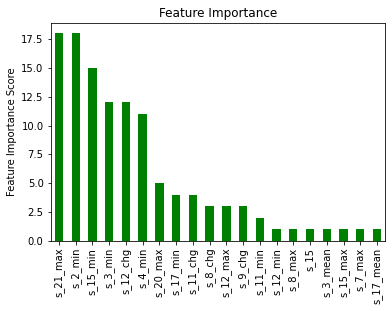

In [77]:
evaluate_model(xgb0, independent, dependent, features)

In [78]:
df_testing=df_train_test.copy() 
df_training=df_train_test.copy()

In [79]:
df_training['P_FAIL'] = xgb0.predict_proba(df_training[features])[:,1];
df_training['Y_FAIL'] = np.where(((df_training.P_FAIL <= .50)), 0, 1)

#Print model report:
print("Accuracy: %.4g" % metrics.accuracy_score(df_training['coming'].values, df_training['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_training['coming'], df_training['P_FAIL']))

Accuracy: 0.9014
AUC Score (Train): 0.904656


In [80]:
df_training['P_FAIL'] = xgb0.predict_proba(df_training[features])[:,1];
df_training['Y_FAIL'] = np.where(((df_training.P_FAIL <= .67)), 0, 1)

#Print model report:
print("Accuracy: %.4g" % metrics.accuracy_score(df_training['coming'].values, df_training['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_training['coming'], df_training['P_FAIL']))

Accuracy: 0.8984
AUC Score (Train): 0.904656


In [81]:
df_testing['P_FAIL'] = xgb0.predict_proba(df_testing[features])[:,1];
df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL <= .78)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_testing['coming'].values, df_testing['Y_FAIL']))
print("AUC Score (Test): %f" % metrics.roc_auc_score(df_testing['coming'], df_testing['P_FAIL']))

Accuracy : 0.8955
AUC Score (Test): 0.904656


In [ ]:
# applying the model into the test_data


In [85]:
df_testing['P_FAIL'] = xgb0.predict_proba(df_testing[features])[:,1];
df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL <= .50)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_testing['coming'].values, df_testing['Y_FAIL']))
print("AUC Score (Test): %f" % metrics.roc_auc_score(df_testing['coming'], df_testing['P_FAIL']))

Accuracy : 0.9014
AUC Score (Test): 0.904656


In [100]:
##

df_testing['P_FAIL']



20632    0.000038
20633    0.000038
20634    0.000038
20635    0.000038
20636    0.000038
           ...   
33722    0.999939
33723    0.996510
33724    0.999577
33725    0.999693
33726    0.999940
Name: P_FAIL, Length: 13095, dtype: float32

In [99]:

df_testing['Y_FAIL']

20632    0
20633    0
20634    0
20635    0
20636    0
        ..
33722    1
33723    1
33724    1
33725    1
33726    1
Name: Y_FAIL, Length: 13095, dtype: int64

In [103]:
####
output=pd.DataFrame({'asset_id':df_testing.asset_id,'coming':df_testing['Y_FAIL']})

#output['coming']=output['coming']#.astype(int)
output.to_csv('PaperCO.csv',index=False)

In [ ]:
######### deleted unnecessary code box

## JohnHHU